<a href="https://colab.research.google.com/github/FaithKare/Electric-car-sharing-service-W4-IP/blob/master/Moringa_Data_Science_Prep_WEEK4_IP_2021_08_Faith_Wangari_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#importing the libraries we need
import numpy as np 
import pandas as pd

In [93]:
#reading data from the csv file and creating a dataframe to be used 
df = pd.read_csv('Autolib_dataset (2).csv')

In [94]:
#getting indormation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [95]:
#checking for validity that is drop attributes we dont need in analysis kin,rental status
dt1 = df.drop(['Displayed comment', 'Geo point','Scheduled at','Slots','Charge Slots','Address', 'Cars'],axis = 1)
dt1.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23


In [96]:
#data selection; seleting rows and dropping those not required for analysis 
#dropping rows with stations kind as center 
list = ['CENTER']
dt2 = dt1[~dt1.Kind.isin(list)]
dt2.head()
# selecting rows with rental status as operational only
status = ['operational']
dt3 = dt2[dt2['Rental status'].isin(status)]
dt3
#dropping rows wit station type as subcenter 
type = ['subs_center']
dt4 = dt3[~dt3['Station type'].isin(type)]
dt4
#dropping rows with subscription status as future
sub = ['future']
dt5 = dt4[~dt4['Subscription status'].isin(sub)]
dt5


,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,station,ok,nonexistent,2018,4,6,11,26
4996,4,0,0,operational,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,station,ok,nonexistent,2018,4,4,16,56
4997,1,0,0,operational,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,station,ok,nonexistent,2018,4,1,7,1
4998,2,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,nonexistent,2018,4,4,17,27


In [97]:
#data cleaning
#checking for missing values 
dt5.isnull().values.any()

#checking and dropping duplicate
dt5.drop_duplicates()

#data consistency of columns and coding scheme
dt5.columns = dt5.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dt5.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charging_status,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,year,month,day,hour,minute
0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23


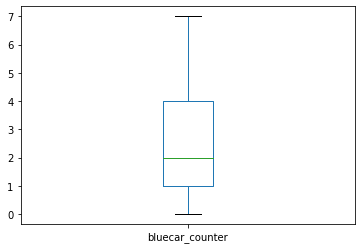

In [123]:
#checking for outliers in the bluecar column using a boxplot
dt5.boxplot(column = ['bluecar_counter'],grid=False)

In [98]:
#merging the year,month,day,hour, minute columns 
dt5['date'] = pd.to_datetime(dt6[['year','month','day','hour','minute']])

#sorting the dataframe by DATE
dt5 = dt5.sort_values(by=['id','date'])
dt5.head()


,bluecar_counter,utilib_counter,utilib_1.4_counter,charging_status,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,year,month,day,hour,minute,date
4424,2,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,station,ok,nonexistent,2018,4,1,0,36,2018-04-01 00:36:00
1843,4,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,station,ok,nonexistent,2018,4,1,1,36,2018-04-01 01:36:00
4986,3,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,station,ok,nonexistent,2018,4,3,4,3,2018-04-03 04:03:00
2677,4,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,station,ok,nonexistent,2018,4,3,22,27,2018-04-03 22:27:00
3218,6,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,station,ok,nonexistent,2018,4,4,3,30,2018-04-04 03:30:00


In [103]:
#getting the difference column that is the differnce between consecutive rows of the blue car column
#negative values show the car was picked , positive values shows the car was returned and 0 or null values show that nothing happemed.
dt5['diff'] = dt5['bluecar_counter'].diff()
dt5['diff']

4424    NaN
1843    2.0
4986   -1.0
2677    1.0
3218    2.0
       ... 
1485   -1.0
1944   -5.0
1975    0.0
3023    0.0
4092    2.0
Name: diff, Length: 4618, dtype: float64

In [90]:
#getting the most popular hour for picking a blue car over the city of paris in the month of april 

a = dt5[(dt5['diff'] < 0) & (dt5['city'] == "Paris")]
a.groupby('hour')['hour'].count().sort_values(ascending=False).head(1)

hour
16    54
Name: hour, dtype: int64

In [44]:
# getting the most popular picking hour of a blue car 
a = dt5[dt5['diff'] < 0].groupby('hour')['hour'].count()
picking_hr = a.sort_values(ascending = False).head(1)
picking_hr

hour
18    98
Name: hour, dtype: int64

In [112]:
#getting he most popular returning hour of aa blue car
a = dt5[dt5['diff'] > 0].groupby('hour')['hour'].count()
returning_hr = a.sort_values(ascending = False).head(1)
returning_hr

hour
6    88
Name: hour, dtype: int64

In [46]:
# most popular station overrall 
dt5['public_name'].value_counts().idxmax()

'Paris/Porte de Montrouge/8'

In [83]:
#getting the most popular station at the most popuar picking hour that is at the 18th hour 
b = dt5[(dt5['diff'] < 0) & (dt5['hour'] == 18)]
name = b.groupby(dt5['public_name'])['public_name'].count()
name.sort_values(ascending= False).head(1)

public_name
Paris/25 AoÃ»t 1944/8    2
Name: public_name, dtype: int64

In [66]:
#getting the most popular postal code for picking up blue cars overall 

b = dt5[(dt5['diff'] < 0)]
code1 = b.groupby(dt5['postal_code'])['bluecar_counter'].count()
code1.sort_values(ascending= False).head(1)

postal_code
75015    89
Name: bluecar_counter, dtype: int64

In [65]:
#getting the most popular postal code for picking up blue cars at the most popular picking hour 

b = dt5[(dt5['diff'] < 0) &  (dt5['hour'] == 18)]
code2 = b.groupby(dt5['postal_code'])['bluecar_counter'].count()
code2.sort_values(ascending= False).head(1)

postal_code
75019    7
Name: bluecar_counter, dtype: int64

In [52]:
# checking if the most popular station overall belong to the most popular postal code

dt5.loc[dt5['public_name'] == 'Paris/Porte de Montrouge/8']['postal_code']
#the popular station does not belong to the most popular code 

2112    75014
2179    75014
3558    75014
4490    75014
1010    75014
1282    75014
3307    75014
1527    75014
194     75014
122     75014
3392    75014
360     75014
2991    75014
Name: postal_code, dtype: int64

In [105]:
#getting the difference column that is the differnce between consecutive rows of the utilib_1.4 car column
#negative values show the car was picked , positive values shows the car was returned and 0 or null values show that nothing happemed.
dt5['diff2'] = dt5['utilib_1.4_counter'].diff()
dt5['diff2']

4424    NaN
1843    0.0
4986    0.0
2677    0.0
3218    0.0
       ... 
1485    0.0
1944    0.0
1975    0.0
3023    0.0
4092    0.0
Name: diff2, Length: 4618, dtype: float64

In [109]:
#getting the most popular postal code for picking utilib 1.4 counter car 
b = dt5[(dt5['diff2'] < 0)]
code3 = b.groupby(dt5['postal_code'])['utilib_1.4_counter'].count()
code3.sort_values(ascending= False).head(1)

postal_code
75017    26
Name: utilib_1.4_counter, dtype: int64

In [110]:
#getting the most popular picking hour for the utilib _1.4 car 
a = dt5[dt5['diff2'] < 0].groupby('hour')['hour'].count()
picking_hr = a.sort_values(ascending = False).head(1)
picking_hr

hour
11    32
Name: hour, dtype: int64

In [113]:
#getting he most popular returning hour of aa blue car
a = dt5[dt5['diff2'] > 0].groupby('hour')['hour'].count()
returning_hr = a.sort_values(ascending = False).head(1)
returning_hr

hour
3    27
Name: hour, dtype: int64

In [111]:
#getting the most popular station at the most popuar picking hour of the utilib car that is at the 11th hour 
b = dt5[(dt5['diff2'] < 0) & (dt5['hour'] == 11)]
name = b.groupby(dt5['public_name'])['public_name'].count()
name.sort_values(ascending= False).head(1)

public_name
Vincennes/Fontenay/44    1
Name: public_name, dtype: int64

In [115]:
#gettig the most popular postal code for picking  a utilib_1.4 car at the most popular picking hour 
a = dt5[(dt5['diff2'] < 0) &  (dt5['hour'] == 11)]
code2 = b.groupby(dt5['postal_code'])['utilib_1.4_counter'].count()
code2.sort_values(ascending= False).head(1)

postal_code
75017    6
Name: utilib_1.4_counter, dtype: int64